In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import vartests

In [96]:
columns = ['SPX', 'DAX', 'WIG20', 'EURUSD']
data = pd.read_csv('study_data.csv', header=0, names=['Date', 'SPX', 'DAX', 'WIG20', 'EURUSD'], index_col='Date', parse_dates=['Date'])

In [97]:
data_forecasting = data.iloc[249:2308]
data_forecasting = sm.add_constant(data_forecasting)
data_forecasting

,const,SPX,DAX,WIG20,EURUSD
Date,,,,,
2013-02-11,1.0,-0.060627,-0.240745,0.098532,0.268998
2013-02-12,1.0,0.159397,0.345889,-1.102991,0.372412
2013-02-13,1.0,0.059215,0.672651,0.029545,-0.022306
2013-02-14,1.0,0.069040,-1.051950,-0.602733,-0.686467
2013-02-15,1.0,-0.104565,-0.494986,0.457760,0.007487
...,...,...,...,...,...
2022-03-11,1.0,-1.304629,1.374300,3.158294,-0.709641
2022-03-14,1.0,-0.744863,2.184632,-3.063428,0.223390
2022-03-15,1.0,2.118255,-0.085038,1.399293,0.274890


In [98]:
var_coeffs_ext = pd.read_csv('var_coeffs_ext_bayesian_new.csv')
var_coeffs_ext.index = data_forecasting.index
var_coeffs_ext

,SPX_const,SPX_SPXl1,SPX_DAXl1,SPX_WIG20l1,SPX_EURUSD_l1,DAX_const,DAX_SPXl1,DAX_DAXl1,DAX_WIG20l1,DAX_EURUSD_l1,WIG20_const,WIG20_SPXl1,WIG20_DAXl1,WIG20_WIG20l1,WIG20_EURUSD_l1,EURUSD_const,EURUSD_SPXl1,EURUSD_DAXl1,EURUSD_WIG20l1,EURUSD_EURUSD_l1
Date,,,,,,,,,,,,,,,,,,,,
2013-02-11,0.056034,0.073177,-0.020747,-0.022094,-0.051358,0.064093,0.497323,-0.178166,-0.024622,-0.125895,0.021504,0.369218,-0.275176,0.022481,0.045079,0.027111,-0.015701,-0.069509,0.035280,0.038150
2013-02-12,0.054835,0.068899,-0.016717,-0.023123,-0.044744,0.065291,0.498980,-0.178508,-0.030791,-0.126597,0.021099,0.380512,-0.275741,0.019755,0.023311,0.031251,-0.004865,-0.073709,0.032592,0.019489
2013-02-13,0.051901,0.062862,-0.018718,-0.018895,-0.031773,0.055755,0.478199,-0.187369,-0.018163,-0.085071,0.019182,0.377379,-0.280331,0.025112,0.031424,0.027601,-0.002812,-0.079037,0.035465,0.023787
2013-02-14,0.052645,0.058110,-0.015293,-0.015954,-0.032556,0.052404,0.470962,-0.181597,-0.014913,-0.078018,0.020977,0.376832,-0.280028,0.023829,0.029541,0.030215,-0.002105,-0.070446,0.032564,0.019426
2013-02-15,0.048036,0.061590,-0.011286,-0.025243,-0.033672,0.050213,0.469028,-0.176503,-0.017009,-0.078452,0.009178,0.369517,-0.269055,0.020180,0.039968,0.023163,-0.006654,-0.068231,0.030056,0.028499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-11,0.028319,0.022842,0.112514,-0.134024,-0.084363,0.017333,0.298421,-0.140094,-0.068157,-0.058706,0.000585,0.647432,-0.190012,-0.078892,-0.198974,-0.044971,0.069459,-0.013673,0.001081,0.018703
2022-03-14,0.035507,0.009503,0.139862,-0.152992,-0.068076,0.015921,0.295119,-0.131717,-0.067371,-0.061824,0.001139,0.622632,-0.148709,-0.104272,-0.193326,-0.042961,0.067292,-0.005896,-0.003556,0.023429
2022-03-15,0.041830,0.036939,0.118815,-0.143214,-0.059545,0.027660,0.328884,-0.158764,-0.056660,-0.047080,0.013345,0.644336,-0.162351,-0.094966,-0.177445,-0.041152,0.072146,-0.010232,-0.002089,0.023304


In [99]:
#predict implied volatility and VaR based on multivariate GARCH(1,1) model
b_var_forecast = pd.read_csv('varf_h_forecast_bayesian_new.csv', parse_dates=['Date'], index_col='Date')

coeff_cols_SPX = ['SPX_const', 'SPX_SPXl1', 'SPX_DAXl1', 'SPX_WIG20l1', 'SPX_EURUSD_l1']
coeff_cols_DAX = ['DAX_const', 'DAX_SPXl1', 'DAX_DAXl1', 'DAX_WIG20l1', 'DAX_EURUSD_l1']
coeff_cols_WIG20 = ['WIG20_const', 'WIG20_SPXl1', 'WIG20_DAXl1', 'WIG20_WIG20l1', 'WIG20_EURUSD_l1'] 
coeff_cols_EURUSD = ['EURUSD_const', 'EURUSD_SPXl1', 'EURUSD_DAXl1', 'EURUSD_WIG20l1', 'EURUSD_EURUSD_l1']


SPX = pd.DataFrame(np.multiply(np.array(var_coeffs_ext[coeff_cols_SPX]), np.array(data_forecasting)))
DAX = pd.DataFrame(np.multiply(np.array(var_coeffs_ext[coeff_cols_DAX]), np.array(data_forecasting)))
WIG20 = pd.DataFrame(np.multiply(np.array(var_coeffs_ext[coeff_cols_WIG20]), np.array(data_forecasting)))
EURUSD = pd.DataFrame(np.multiply(np.array(var_coeffs_ext[coeff_cols_EURUSD]), np.array(data_forecasting)))

for i in range(len(b_var_forecast)):
    b_var_forecast['SPX'].iloc[i] = np.sum(SPX.iloc[i])
    b_var_forecast['DAX'].iloc[i] = np.sum(DAX.iloc[i])
    b_var_forecast['WIG20'].iloc[i] = np.sum(WIG20.iloc[i])
    b_var_forecast['EURUSD'].iloc[i] = np.sum(EURUSD.iloc[i])

b_var_forecast

,SPX,DAX,WIG20,EURUSD
Date,,,,
2013-02-12,0.040600,0.040542,0.079708,0.058535
2013-02-13,0.068876,0.069899,-0.026732,-0.023711
2013-02-14,0.043183,-0.040602,-0.146995,-0.025213
2013-02-15,0.104709,0.338495,0.306926,0.071212
2013-02-20,0.035375,0.080162,0.113256,0.071604
...,...,...,...,...
2022-03-14,-0.210272,-0.738126,-1.213170,-0.164240
2022-03-15,0.787449,-0.299080,-0.511269,-0.089839
2022-03-16,-0.106793,0.645595,1.210356,0.116023


In [100]:
#save to csv
b_var_forecast.to_csv('value_at_risk_bayesian.csv')

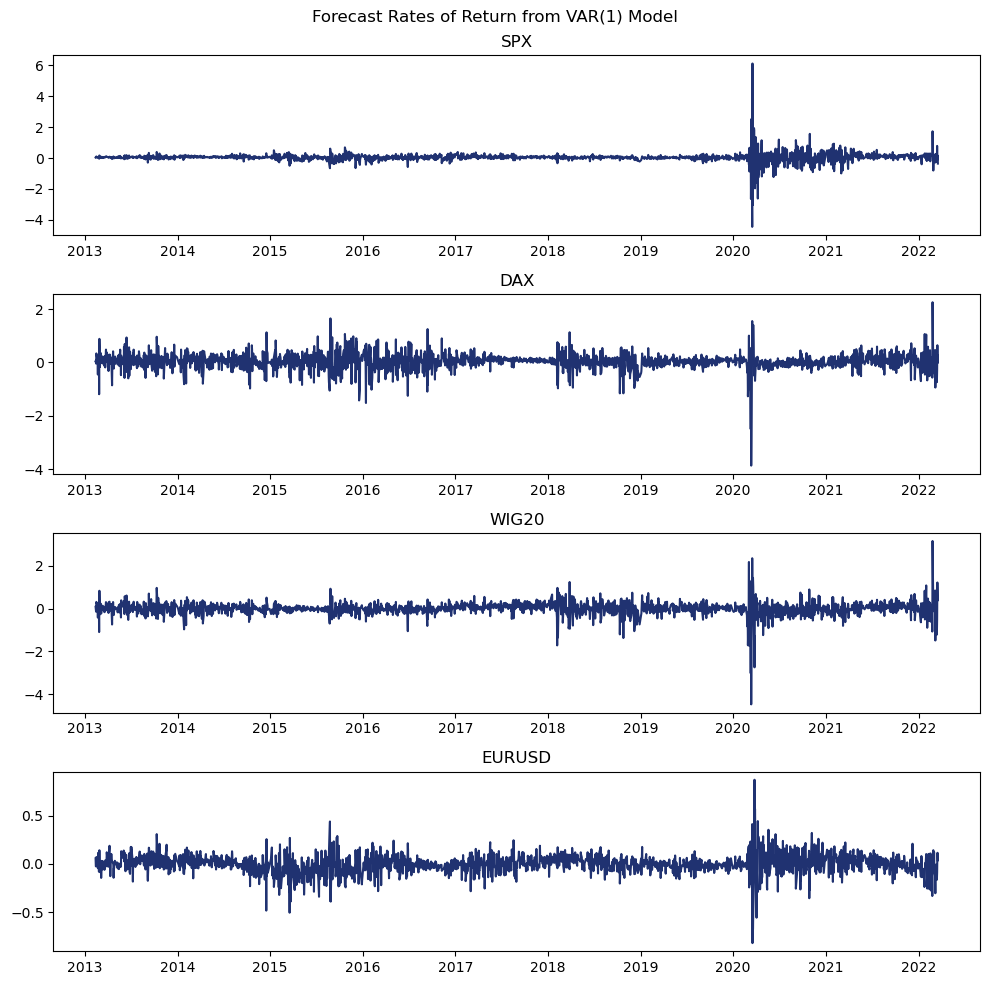

In [101]:
#plot forecast rates of return
fig, ax = plt.subplots(4, 1, dpi=100, figsize=(10,10))
plt.suptitle('Forecast Rates of Return from VAR(1) Model')

a=0
for i in columns:
    ax[a].plot(b_var_forecast[i], c='#203271')
    ax[a].set_title('%s' %i)
    a += 1
    
plt.tight_layout()
plt.show()
fig.savefig('returns forecast bayesian.pdf', bbox_inches='tight')

In [102]:
#porfolio weights vector omega_t (time-constant)
omega = np.array([.625, .235, .11, .03])

In [103]:
#H-matrices forecast
H_b_forecast = pd.read_csv('dccf_H_forecast_bayesian_new.csv')
H_b_forecast

,H11,H12,H13,H14,H21,H22,H23,H24,H31,H32,H33,H34,H41,H42,H43,H44
0,0.031636,0.076532,0.039035,0.020550,0.076532,0.989617,0.686580,0.245254,0.039035,0.686580,1.067689,0.194504,0.020550,0.245254,0.194504,0.275654
1,0.031238,0.083234,0.045172,0.023532,0.083234,1.010875,0.691697,0.247927,0.045172,0.691697,1.058848,0.194904,0.023532,0.247927,0.194904,0.276169
2,0.030845,0.088370,0.050576,0.026104,0.088370,1.013212,0.692792,0.248266,0.050576,0.692792,1.057979,0.195889,0.026104,0.248266,0.195889,0.276636
3,0.030457,0.092679,0.055233,0.028316,0.092679,1.013469,0.693361,0.248349,0.055233,0.693361,1.057893,0.196823,0.028316,0.248349,0.196823,0.277058
4,0.030073,0.096332,0.059226,0.030214,0.096332,1.013497,0.693815,0.248402,0.059226,0.693815,1.057885,0.197653,0.030214,0.248402,0.197653,0.277440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,1.435158,0.474358,0.439702,0.097235,0.474358,0.774188,0.546550,0.004026,0.439702,0.546550,1.255797,0.044877,0.097235,0.004026,0.044877,0.113349
511,1.352826,0.442224,0.383434,0.092456,0.442224,0.766061,0.531310,0.000002,0.383434,0.531310,1.234396,0.040227,0.092456,0.000002,0.040227,0.117419
512,1.282184,0.420671,0.349662,0.088817,0.420671,0.762056,0.522991,-0.002314,0.349662,0.522991,1.222294,0.037524,0.088817,-0.002314,0.037524,0.119570
513,1.221570,0.405270,0.328355,0.085987,0.405270,0.760082,0.518416,-0.003636,0.328355,0.518416,1.215451,0.035972,0.085987,-0.003636,0.035972,0.120707


In [104]:
#VaR forecast
from scipy.stats import norm

z_alpha = norm().ppf(.95)
VaR = []
j = 0

for i in range(len(b_var_forecast)):
    if (((i%20)==0) & (i!=20)):
        j+=1
    H_b_t = np.array(H_b_forecast.iloc[j]).reshape((4,4)).T
    VaR_b = (1-np.exp(omega@b_var_forecast.iloc[i]+z_alpha*np.sqrt(omega.T@H_b_t@omega)))
    VaR.append(VaR_b)

VaR = pd.DataFrame(VaR, columns=['VaR forecast'], index=b_var_forecast.index)
VaR

,VaR forecast
Date,
2013-02-12,-0.992086
2013-02-13,-1.012903
2013-02-14,-0.904612
2013-02-15,-1.281068
2013-02-20,-1.012363
...,...
2022-03-14,-0.679499
2022-03-15,-2.761014
2022-03-16,-2.265262


In [105]:
#VaR assessment
#calculate portfolio returns
data_short = data.iloc[-len(b_var_forecast):]
daily_return = []

for i in range(len(b_var_forecast)):
    portfolio_daily_return = data_short[columns].iloc[i]@omega.T
    daily_return.append(portfolio_daily_return)

In [126]:
print(min(VaR['VaR forecast']))

-175.23279643887594


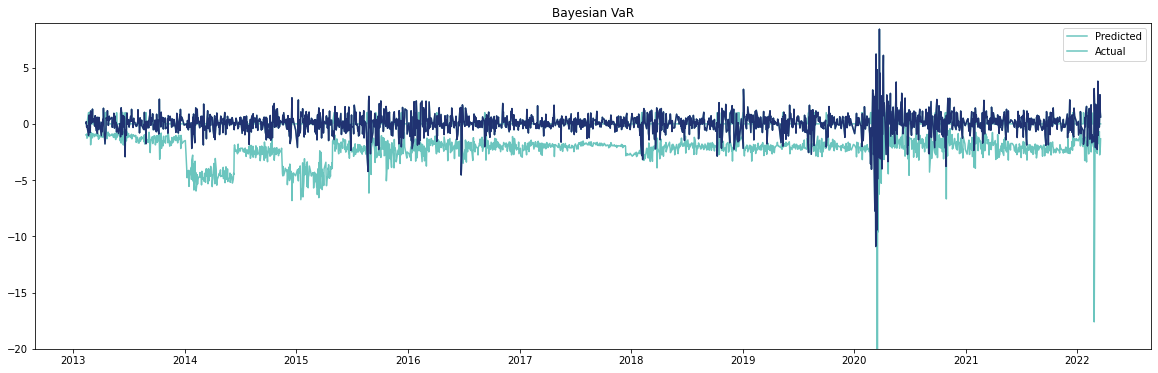

In [122]:
plt.figure(figsize=(20,6))
plt.plot(VaR, color='#6bc5be')
plt.plot(data_short.index, daily_return, c='#203271')
plt.ylim((-20, 9))
plt.title('Bayesian VaR')
plt.legend(['Predicted','Actual'])
plt.savefig('bayesian VaR.pdf', bbox_inches='tight')
plt.show()

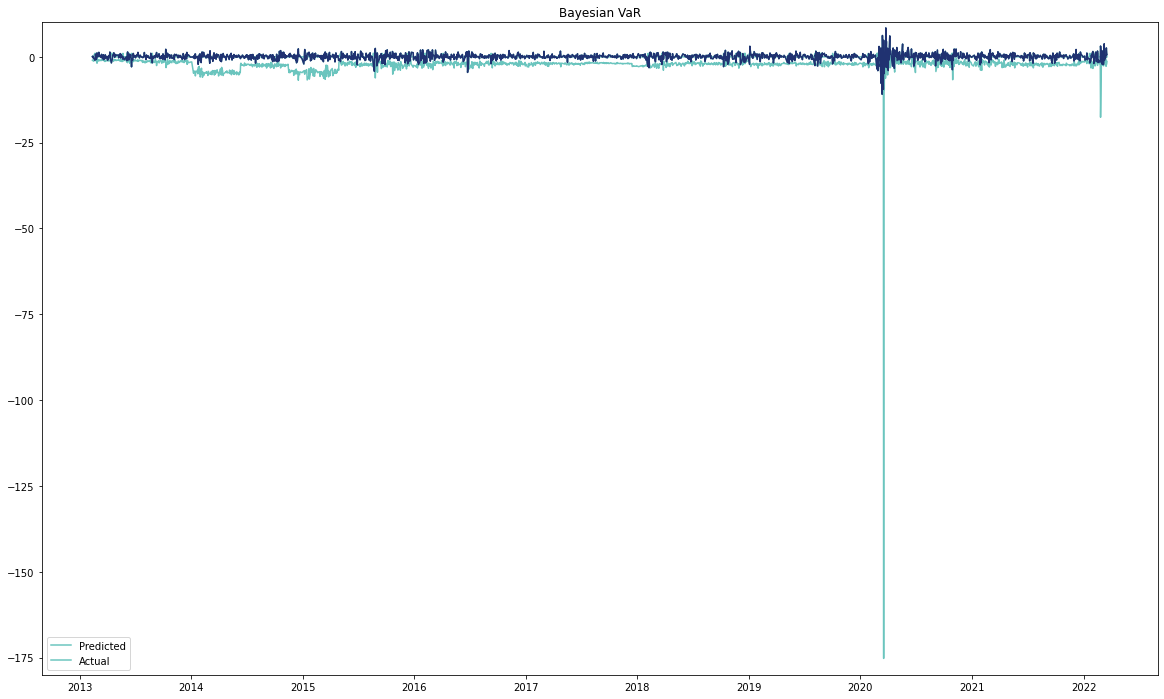

In [124]:
plt.figure(figsize=(20,12))
plt.plot(VaR, color='#6bc5be')
plt.plot(data_short.index, daily_return, c='#203271')
plt.ylim((-180, 10))
plt.title('Bayesian VaR')
plt.legend(['Predicted','Actual'])
plt.savefig('bayesian VaR full scale.pdf', bbox_inches='tight')
plt.show()

In [107]:
VaR['Actual'] = daily_return
VaR['Exceeded'] = np.where(VaR['VaR forecast']>VaR['Actual'], True, False)
VaR

,VaR forecast,Actual,Exceeded
Date,,,
2013-02-12,-0.992086,0.070751,False
2013-02-13,-1.012903,0.197663,False
2013-02-14,-0.904612,-0.290953,False
2013-02-15,-1.281068,-0.131097,False
2013-02-20,-1.012363,-1.025583,True
...,...,...,...
2022-03-14,-0.679499,-0.282426,False
2022-03-15,-2.761014,1.466094,False
2022-03-16,-2.265262,2.591730,False


In [108]:
print('VaR exceeded %10.4f' % float(sum(VaR['Exceeded'])*100/len(VaR)), '% of the time')

VaR exceeded     4.1768 % of the time


In [109]:
vartests.kupiec_test(VaR['Exceeded'], var_conf_level=0.95, conf_level=0.95)

{'statictic test': 3.1043208849674246,
 'chi square value': 0.9219152092581446,
 'null hypothesis': 'Probability of failure is 0.05',
 'result': 'Fail to reject H0'}

In [110]:
var_coeffs = pd.read_csv('var_coeffs_bayesian_new.csv')
var_coeffs.head()

,SPX_const,SPX_SPXl1,SPX_DAXl1,SPX_WIG20l1,SPX_EURUSD_l1,DAX_const,DAX_SPXl1,DAX_DAXl1,DAX_WIG20l1,DAX_EURUSD_l1,WIG20_const,WIG20_SPXl1,WIG20_DAXl1,WIG20_WIG20l1,WIG20_EURUSD_l1,EURUSD_const,EURUSD_SPXl1,EURUSD_DAXl1,EURUSD_WIG20l1,EURUSD_EURUSD_l1
0,0.056064,0.074676,-0.015691,-0.024106,-0.058330,0.063775,0.498236,-0.175384,-0.026281,-0.141247,0.016695,0.369936,-0.268996,0.022873,0.041159,0.026579,-0.017302,-0.065046,0.029714,0.039437
1,0.045625,0.071694,-0.037322,-0.015915,0.000303,0.041135,0.546840,-0.225976,-0.030388,-0.011020,-0.016465,0.364513,-0.255514,-0.007364,0.055318,0.005453,0.013633,-0.085816,0.024806,0.037117
2,0.033738,0.070236,-0.015826,-0.029617,-0.018084,0.008747,0.463404,-0.143864,-0.077443,-0.018031,-0.030779,0.334823,-0.207146,0.003356,-0.032124,0.007377,-0.013508,-0.056640,0.013184,0.045297
3,0.047591,0.082928,-0.021684,-0.031227,-0.065428,0.063991,0.478741,-0.146370,-0.084295,-0.043953,-0.008049,0.303391,-0.203000,0.011307,-0.005856,0.011115,0.001158,-0.057175,0.013425,0.022015
4,0.033355,0.062069,-0.047397,-0.009163,0.003293,0.014772,0.512176,-0.114133,-0.059242,-0.000761,-0.039065,0.380401,-0.222177,0.043921,0.047640,0.017686,-0.015321,-0.043714,0.030105,0.037639


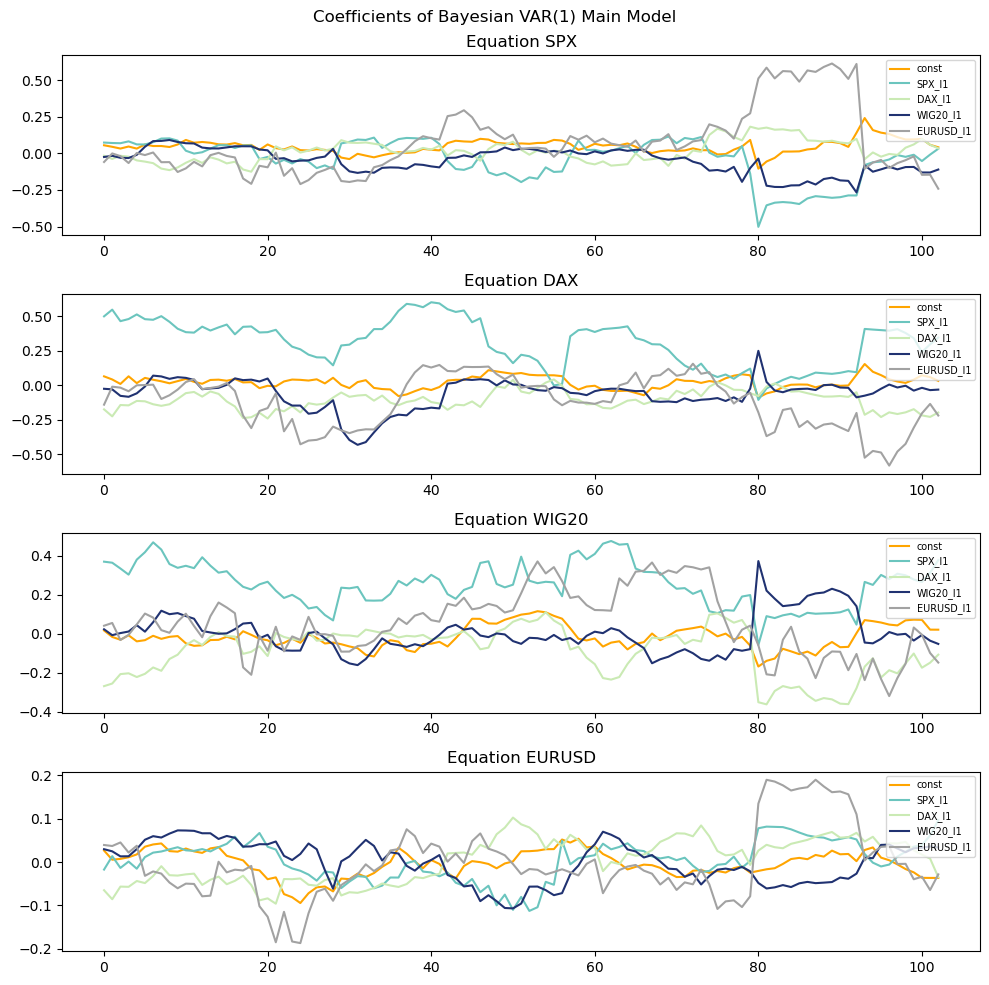

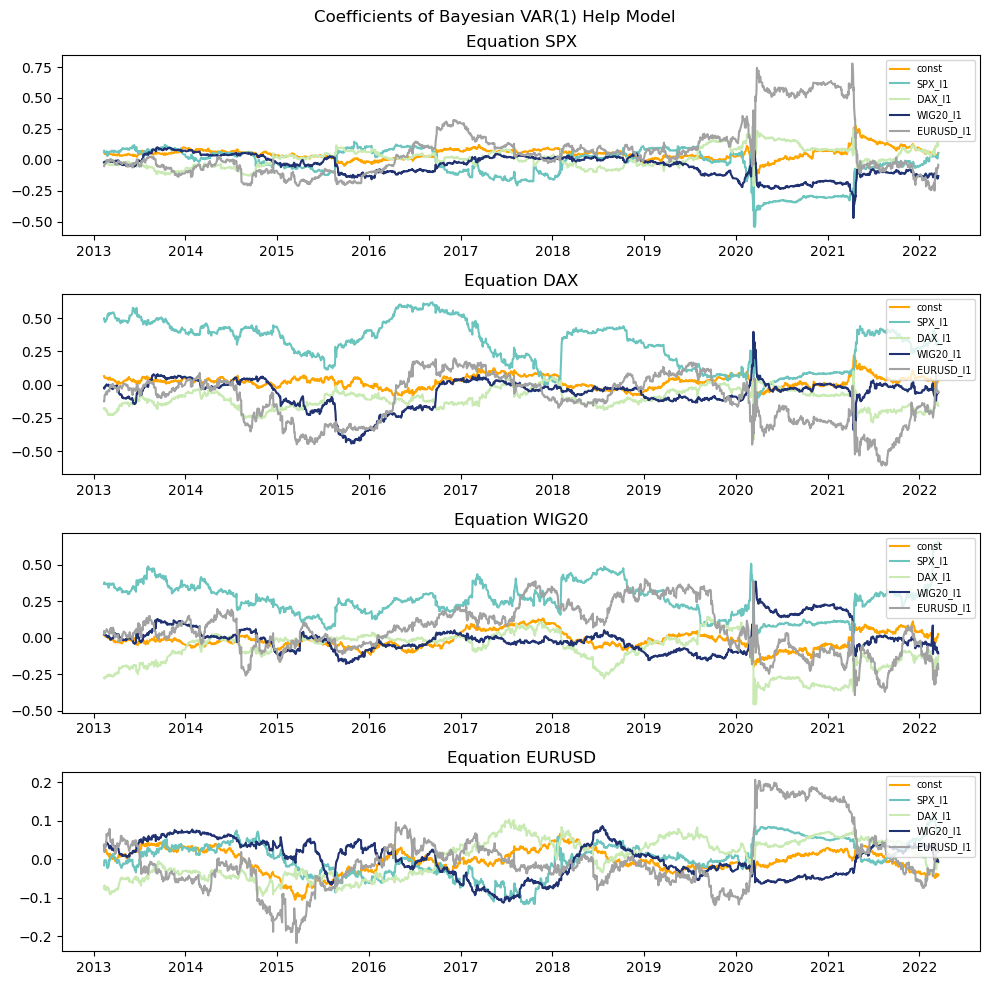

In [111]:
#plot VAR model coefficients
def plot_coefficients(df, flag):
    fig, ax = plt.subplots(4, 1, dpi=100, figsize=(10,10))
    if (flag=='main'):
        plt.suptitle('Coefficients of Bayesian VAR(1) Main Model')
    else:
        plt.suptitle('Coefficients of Bayesian VAR(1) Help Model')
    palette=['orange','#6bc5be','#caeab4','#203271','#a2a2a2']

    coeff_columns = ['SPX_const', 'SPX_SPXl1', 'SPX_DAXl1', 'SPX_WIG20l1', 'SPX_EURUSD_l1', 
                    'DAX_const', 'DAX_SPXl1', 'DAX_DAXl1', 'DAX_WIG20l1', 'DAX_EURUSD_l1', 
                    'WIG20_const', 'WIG20_SPXl1', 'WIG20_DAXl1', 'WIG20_WIG20l1', 'WIG20_EURUSD_l1', 
                    'EURUSD_const', 'EURUSD_SPXl1', 'EURUSD_DAXl1', 'EURUSD_WIG20l1', 'EURUSD_EURUSD_l1']

    a=0
    b=0
    for i in coeff_columns:
        ax[a].plot(df[i], c=palette[b%5], label=i)
        if(b==4 or b==9 or b==14):
            a+=1
        b+=1

    coeff_names = ['const', 'SPX_l1', 'DAX_l1', 'WIG20_l1', 'EURUSD_l1']
    for j in range(4):
        ax[j].set_title('Equation %s'%columns[j])
        ax[j].legend(coeff_names, loc='upper right', fontsize='x-small')

    plt.tight_layout()
    plt.show()
    
    if (flag=='main'):
        fig.savefig('main coefficients bayesian.pdf', bbox_inches='tight')
    else:
        fig.savefig('help coefficients bayesian.pdf', bbox_inches='tight')
        
plot_coefficients(var_coeffs, 'main')
plot_coefficients(var_coeffs_ext, 'help')

In [112]:
vartests.duration_test(VaR['Exceeded'], conf_level=0.95)

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


{'weibull exponential': array([0.6111418]),
 'unrestricted log-likelihood': array([-324.4617618]),
 'restricted log-likelihood': -352.4844602416041,
 'log-likelihood': array([56.04539688]),
 'log-likelihood ratio test statistic': array([7.0832229e-14]),
 'null hypothesis': 'Duration Between Exceedances have no memory (Weibull b=1 = Exponential)',
 'decision': 'Reject H0'}

In [113]:
range(1,len(VaR))

range(1, 2059)

In [115]:
import scipy.stats

#Christoffersen test
def christoffersen_test(series, q):
    u_00 = u_01 = u_10 = u_11 = 0
    #count the number of transitions
    for i in range(1,len(series)):
        if (series[i]==series[i-1]):
            if(series[i]==False):
                u_00 += 1
            else:
                u_11 += 1
        else:
            if ((series[i]==True) & (series[i-1]==False)):
                u_01 += 1
            else:
                u_10 += 1
    #construct test statistic chi^2_*
    pi = (u_01+u_11)/(u_00 + u_01 + u_10 + u_11)
    pi_01 = u_01/(u_00+u_01)
    pi_11 = u_11/(u_10+u_11)
    nom = ((1-pi_01)**u_00)*(pi_01**u_01)*((1-pi_11)**u_10)*(pi_11**u_11)
    denom = ((1-pi)**(u_00+u_10))*(pi**(u_01+u_11))
    chisq_test = -2*np.log(denom)+2*np.log(nom)
    chisq_critical = scipy.stats.chi2.ppf(1-q, 1)
    #put together results
    results = dict()
    results['stats'] = {'u_00':u_00, 'u_01': u_01, 'u_10':u_10, 'u_11':u_11, 'pi':pi, 'pi_01':pi_01, 'pi_11':pi_11}
    results['likelihood ratio'] = denom/nom
    results['test statistic'] = chisq_test
    results['critical value'] = chisq_critical
    results['null hypothesis'] = 'VaR violations are independent in time'
    if (chisq_test>chisq_critical):
        results['decision'] = 'reject H0'
    else:
        results['decision'] = 'failed to reject H0'
    for key, value in results.items():
        print(key, ':', value)
    return results

s=VaR['Exceeded']
VaR_christoffersen = christoffersen_test(s, 0.05)

stats : {'u_00': 1903, 'u_01': 69, 'u_10': 69, 'u_11': 17, 'pi': 0.04178814382896016, 'pi_01': 0.03498985801217039, 'pi_11': 0.19767441860465115}
likelihood ratio : 2.1144450724699077e-07
test statistic : 30.738606499939465
critical value : 3.841458820694124
null hypothesis : VaR violations are independent in time
decision : reject H0
